In [2]:
import shutil
import os
import numpy as np
import argparse

# Data split


## path + calculates how many train data per class

### !set path

In [4]:
def get_files_from_folder(path):

    files = os.listdir(path)
    return np.asarray(files)

# Path to data
path_to_data = "./data/video/train_ravdess"
# Path to test data where to save
path_to_test_data = "./data/video/test_ravdess"
# Train ratio - 0.7 means splitting data in 70 % train and 30 % test
train_ratio = float(0.7)

# get dirs
_, dirs, _ = next(os.walk(path_to_data))

# calculates how many train data per class
data_counter_per_class = np.zeros((len(dirs)))
for i in range(len(dirs)):
    path = os.path.join(path_to_data, dirs[i])
    files = get_files_from_folder(path)
    data_counter_per_class[i] = len(files)
print("data per class", data_counter_per_class)
test_counter = np.round(data_counter_per_class * (1 - train_ratio))
print("data per test", test_counter)

data per class [32. 32.  0. 32. 32. 16. 32.  0.]
data per test [10. 10.  0. 10. 10.  5. 10.  0.]


## transfers files

In [5]:
# transfers files
for i in range(len(dirs)):
    path_to_original = os.path.join(path_to_data, dirs[i])
    path_to_save = os.path.join(path_to_test_data, dirs[i])

    #creates dir
    if not os.path.exists(path_to_save):
        os.makedirs(path_to_save)
    files = get_files_from_folder(path_to_original)
                                 
    # random file sequence
    np.random.shuffle(files)
                                  
    # moves data
    for j in range(int(test_counter[i])):
        dst = os.path.join(path_to_save, files[j])
        src = os.path.join(path_to_original, files[j])
        shutil.move(src, dst)



# Face alignment part
## Preprocess video to frame

In [6]:
import subprocess
import os
import threading
import pdb
import copy

In [7]:
def run_threads(threads, n_thread):
    used_thread = []
    for num, new_thread in enumerate(threads):
        print('thread index: {:}'.format(num), end=' \t')
        new_thread.start()
        used_thread.append(new_thread)
        
        if num % n_thread == 0:
            for old_thread in used_thread:
                old_thread.join()
            used_thread = []

class threadFun(threading.Thread):
    def __init__(self, func, args):
        super(threadFun, self).__init__()
        self.fun = func
        self.args = args
    def run(self):
        self.fun(*self.args)

In [8]:
VIDEO_EXTENSIONS = ['mp4', 'webm', 'avi']

# check file name, is it end with video type extension
def is_video_file(filename):
    return any(filename.endswith(extension) for extension in VIDEO_EXTENSIONS)

# helper function to make a directory if not exist
def makefile(file_dir):
    if not os.path.exists(file_dir):
        os.makedirs(file_dir)

# use ffmpeg to extract video to frame to the frame_output
def video2frame(video_input, frame_output):
    linux_commod = 'ffmpeg -i {:} -f image2 {:}/%07d.jpg'.format(video_input, frame_output)
    print('{:}'.format(video_input))
    subprocess.getstatusoutput(linux_commod)

In [9]:
def run_vdo2frame(video_dir, frame_dir, n_thread):
    print('Starting: convert videos into frames\nvideo_dir: {:}\tframe_dir: {:}'.format(video_dir, frame_dir))
    threads = []
    for root, dirs, files in os.walk(video_dir):
        for file_name in files:
            if is_video_file(file_name):
                # get video name and path
                video_name = os.path.join(root, file_name)
                # create frame output path from changing video directory in video_name to frame_dir and split the file extension
                frame_output_path = os.path.splitext(video_name.replace(video_dir, frame_dir))[0]
                makefile(frame_output_path)
                threads.append(threadFun(video2frame, (video_name, frame_output_path)))
    run_threads(threads, n_thread)
    print('all threads is finished') 

### !set path
Do on both train and test data

In [12]:
video_dir_train ='./data/video/train_ravdess'
frame_dir_train = './data/frame/train_ravdess'
run_vdo2frame(video_dir_train, frame_dir_train, n_thread =20)

Starting: convert videos into frames
video_dir: ./data/video/train_ravdess	frame_dir: ./data/frame/train_ravdess
thread index: 0 	./data/video/train_ravdess\angry\01-02-05-01-01-01-04.mp4
thread index: 1 	./data/video/train_ravdess\angry\01-02-05-01-01-02-04.mp4
thread index: 2 	./data/video/train_ravdess\angry\01-02-05-01-02-01-04.mp4
thread index: 3 	./data/video/train_ravdess\angry\01-02-05-01-02-02-04.mp4
thread index: 4 	./data/video/train_ravdess\angry\01-02-05-02-02-01-04.mp4
thread index: 5 	./data/video/train_ravdess\angry\02-02-05-01-01-01-01.mp4
thread index: 6 	./data/video/train_ravdess\angry\02-02-05-01-01-01-02.mp4
thread index: 7 	./data/video/train_ravdess\angry\02-02-05-01-01-02-01.mp4
thread index: 8 	./data/video/train_ravdess\angry\02-02-05-01-01-02-02.mp4
thread index: 9 	./data/video/train_ravdess\angry\02-02-05-01-01-02-03.mp4
thread index: 10 	./data/video/train_ravdess\angry\02-02-05-01-02-01-02.mp4
thread index: 11 	./data/video/train_ravdess\angry\02-02-05-0

In [13]:
video_dir_test ='./data/video/test_ravdess'
frame_dir_test = './data/frame/test_ravdess'
run_vdo2frame(video_dir_test, frame_dir_test, n_thread = 20)

Starting: convert videos into frames
video_dir: ./data/video/test_ravdess	frame_dir: ./data/frame/test_ravdess
thread index: 0 	./data/video/test_ravdess\angry\01-02-05-02-01-01-04.mp4
thread index: 1 	./data/video/test_ravdess\angry\01-02-05-02-01-02-04.mp4
thread index: 2 	./data/video/test_ravdess\angry\01-02-05-02-02-02-04.mp4
thread index: 3 	./data/video/test_ravdess\angry\02-02-05-01-01-01-03.mp4
thread index: 4 	./data/video/test_ravdess\angry\02-02-05-01-02-01-01.mp4
thread index: 5 	./data/video/test_ravdess\angry\02-02-05-02-01-01-01.mp4
thread index: 6 	./data/video/test_ravdess\angry\02-02-05-02-01-02-02.mp4
thread index: 7 	./data/video/test_ravdess\angry\02-02-05-02-01-02-03.mp4
thread index: 8 	./data/video/test_ravdess\angry\02-02-05-02-02-01-01.mp4
thread index: 9 	./data/video/test_ravdess\angry\02-02-05-02-02-01-02.mp4
thread index: 10 	./data/video/test_ravdess\calm\02-02-02-01-01-01-03.mp4
thread index: 11 	./data/video/test_ravdess\calm\02-02-02-01-01-01-04.mp4
t

## Face localization

In [14]:
def frame2face(func_path, predictor_path, image_root_folder, save_root_folder, cnn_face_detector, gpu_id=0):

    linux_command = 'python {:} {:} {:} {:} {:} {:}'.format(func_path, predictor_path, 
                                                            image_root_folder, save_root_folder, cnn_face_detector, gpu_id)
    print('{:}'.format(image_root_folder))
    subprocess.getstatusoutput(linux_command)

In [15]:
def run_frame2face(frame_dir, face_dir, n_thread):
    threads = []
    # function
    func_path = './data/face_alignment_code/lib/face_align_cuda.py'
    # Model
    predictor_path      = './data/face_alignment_code/lib/shape_predictor_5_face_landmarks.dat'
    cnn_face_detector   = './data/face_alignment_code/lib/mmod_human_face_detector.dat' 
    for category in os.listdir(frame_dir):
        # create category directory
        category_dir = os.path.join(frame_dir, category)
        for frame_file in os.listdir(category_dir):
            # get frame file name and path for each frame
            frame_root_folder = os.path.join(category_dir, frame_file)
            # create output path for face localization
            face_root_folder = frame_root_folder.replace(frame_dir, face_dir)
            if os.path.isdir(frame_root_folder):
                makefile(face_root_folder)
                threads.append(threadFun(frame2face, (func_path, predictor_path, frame_root_folder, face_root_folder, cnn_face_detector)))

    run_threads(threads, n_thread)
    print('all is over')

### !set path

In [16]:
frame_dir_train = './data/frame/train_ravdess'
face_dir_train  = './data/face/train_ravdess'
run_frame2face(frame_dir_train, face_dir_train, n_thread=20)

thread index: 0 	./data/frame/train_ravdess\angry\01-02-05-01-01-01-04
thread index: 1 	./data/frame/train_ravdess\angry\01-02-05-01-01-02-04
thread index: 2 	./data/frame/train_ravdess\angry\01-02-05-01-02-01-04
thread index: 3 	./data/frame/train_ravdess\angry\01-02-05-01-02-02-04
thread index: 4 	./data/frame/train_ravdess\angry\01-02-05-02-02-01-04
thread index: 5 	./data/frame/train_ravdess\angry\02-02-05-01-01-01-01
thread index: 6 	./data/frame/train_ravdess\angry\02-02-05-01-01-01-02
thread index: 7 	./data/frame/train_ravdess\angry\02-02-05-01-01-02-01
thread index: 8 	./data/frame/train_ravdess\angry\02-02-05-01-01-02-02
thread index: 9 	./data/frame/train_ravdess\angry\02-02-05-01-01-02-03
thread index: 10 	./data/frame/train_ravdess\angry\02-02-05-01-02-01-02
thread index: 11 	./data/frame/train_ravdess\angry\02-02-05-01-02-01-03
thread index: 12 	./data/frame/train_ravdess\angry\02-02-05-01-02-02-01
thread index: 13 	./data/frame/train_ravdess\angry\02-02-05-01-02-02-02
th

In [17]:
frame_dir_test = './data/frame/test_ravdess' 
face_dir_test  = './data/face/test_ravdess'
run_frame2face(frame_dir_test, face_dir_test, n_thread=20)

thread index: 0 	./data/frame/test_ravdess\angry\01-02-05-02-01-01-04
thread index: 1 	./data/frame/test_ravdess\angry\01-02-05-02-01-02-04
thread index: 2 	./data/frame/test_ravdess\angry\01-02-05-02-02-02-04
thread index: 3 	./data/frame/test_ravdess\angry\02-02-05-01-01-01-03
thread index: 4 	./data/frame/test_ravdess\angry\02-02-05-01-02-01-01
thread index: 5 	./data/frame/test_ravdess\angry\02-02-05-02-01-01-01
thread index: 6 	./data/frame/test_ravdess\angry\02-02-05-02-01-02-02
thread index: 7 	./data/frame/test_ravdess\angry\02-02-05-02-01-02-03
thread index: 8 	./data/frame/test_ravdess\angry\02-02-05-02-02-01-01
thread index: 9 	./data/frame/test_ravdess\angry\02-02-05-02-02-01-02
thread index: 10 	./data/frame/test_ravdess\calm\02-02-02-01-01-01-03
thread index: 11 	./data/frame/test_ravdess\calm\02-02-02-01-01-01-04
thread index: 12 	./data/frame/test_ravdess\calm\02-02-02-01-01-02-03
thread index: 13 	./data/frame/test_ravdess\calm\02-02-02-01-02-01-04
thread index: 14 	./

## Create text file for train list and label

 Example Tree-Structured Data Directory (same as test data) <br> 
── train_data <br>
   ├── Angry <br>
   ├── Disgust <br>
   ├── Fear <br>
   ├── Happy <br>
   ├── Neutral <br>
   ├── Sad <br>
   └── Surprise

In [23]:
def get_txt(dir_path, output_path):
    # Open the output file in write mode
    with open(output_path, "w") as f:
    # Walk through the directory
        for root, dirs, files in os.walk(dir_path):
            # Skip if no files in the directory
            if not files:
                continue
            # Get the parent directory name as the label
            label = os.path.basename(os.path.dirname(root))
            # Write the directory path (relative to dir_path) and label to the output file
            relative_path = os.path.relpath(root, dir_path)
            relative_path = relative_path.replace("\\", "/")
            f.write(f"{relative_path} {label}\n")

### !set path

In [24]:
# Train

# Define the directory to scan
train_dir_path = "./data/face/train_ravdess"

# Define the output file path
train_output_file_path = "./data/txt/train_ravdess.txt"

get_txt(train_dir_path, train_output_file_path)

### !set path

In [25]:
# Test

# Define the directory to scan
test_dir_path = "./data/face/test_ravdess"

# Define the output file path
test_output_file_path = "./data/txt/test_ravdess.txt"

get_txt(test_dir_path, test_output_file_path)

# Modeling !!Before Start all process (run from here)

## Data loader

In [1]:
import torch
print(torch.__version__)
import torch.utils.data
import torchvision.transforms as transforms

2.1.2+cu121


In [2]:
import pdb
import os, sys, random
import numpy as np
import torch
import torch.nn.functional as F
import torch.utils.data as data
from PIL import Image

In [3]:
## data generator for afew
class VideoDataset(data.Dataset):
    def __init__(self, video_root, video_list, rectify_label=None, transform=None, csv = False):

        self.imgs_first, self.index = load_imgs_total_frame(video_root, video_list, rectify_label)
        self.transform = transform

    def __getitem__(self, index):

        path_first, target_first = self.imgs_first[index]
        img_first = Image.open(path_first).convert("RGB")
        if self.transform is not None:
            img_first = self.transform(img_first)

        return img_first, target_first, self.index[index]

    def __len__(self):
        return len(self.imgs_first)

# 
class TripleImageDataset(data.Dataset):
    def __init__(self, video_root, video_list, rectify_label=None, transform=None):

        self.imgs_first, self.imgs_second, self.imgs_third, self.index = load_imgs_tsn(video_root, video_list,
                                                                                           rectify_label)
        self.transform = transform

    def __getitem__(self, index):

        path_first, target_first = self.imgs_first[index]
        img_first = Image.open(path_first).convert("RGB")
        if self.transform is not None:
            img_first = self.transform(img_first)

        path_second, target_second = self.imgs_second[index]
        img_second = Image.open(path_second).convert("RGB")
        if self.transform is not None:
            img_second = self.transform(img_second)

        path_third, target_third = self.imgs_third[index]
        img_third = Image.open(path_third).convert("RGB")
        if self.transform is not None:
            img_third = self.transform(img_third)
        return img_first, img_second, img_third, target_first, self.index[index]

    def __len__(self):
        return len(self.imgs_first)

def load_imgs_tsn(video_root, video_list, rectify_label):
    imgs_first = list()
    imgs_second = list()
    imgs_third = list()

    with open(video_list, 'r') as imf:
        index = []
        for id, line in enumerate(imf):

            video_label = line.strip().split()

            video_name = video_label[0]  # name of video
            label = rectify_label[video_label[1]]  # label of video

            video_path = os.path.join(video_root, video_name)  # video_path is the path of each video
            ###  for sampling triple imgs in the single video_path  ####

            img_lists = os.listdir(video_path)
            img_lists.sort()  # sort files by ascending
            img_count = len(img_lists)  # number of frames in video
            num_per_part = int(img_count) // 3

            if int(img_count) > 3:
                for i in range(img_count):

                    random_select_first = random.randint(0, num_per_part)
                    random_select_second = random.randint(num_per_part, num_per_part * 2)
                    random_select_third = random.randint(2 * num_per_part, len(img_lists) - 1)

                    img_path_first = os.path.join(video_path, img_lists[random_select_first])
                    img_path_second = os.path.join(video_path, img_lists[random_select_second])
                    img_path_third = os.path.join(video_path, img_lists[random_select_third])

                    imgs_first.append((img_path_first, label))
                    imgs_second.append((img_path_second, label))
                    imgs_third.append((img_path_third, label))

            else:
                for j in range(len(img_lists)):
                    img_path_first = os.path.join(video_path, img_lists[j])
                    img_path_second = os.path.join(video_path, random.choice(img_lists))
                    img_path_third = os.path.join(video_path, random.choice(img_lists))

                    imgs_first.append((img_path_first, label))
                    imgs_second.append((img_path_second, label))
                    imgs_third.append((img_path_third, label))

            ###  return video frame index  #####
            index.append(np.ones(img_count) * id)  # id: 0 : 379
        index = np.concatenate(index, axis=0)
        # index = index.astype(int)
    return imgs_first, imgs_second, imgs_third, index


def load_imgs_total_frame(video_root, video_list, rectify_label):
    imgs_first = list()

    with open(video_list, 'r') as imf:
        index = []
        video_names = []
        for id, line in enumerate(imf):

            video_label = line.strip().split()

            video_name = video_label[0]  # name of video
            label = rectify_label[video_label[1]]  # label of video

            video_path = os.path.join(video_root, video_name)  # video_path is the path of each video
            ###  for sampling triple imgs in the single video_path  ####

            img_lists = os.listdir(video_path)
            img_lists.sort()  # sort files by ascending
            img_count = len(img_lists)  # number of frames in video

            for frame in img_lists:
                # pdb.set_trace()
                imgs_first.append((os.path.join(video_path, frame), label))
            ###  return video frame index  #####
            video_names.append(video_name)
            index.append(np.ones(img_count) * id)
        index = np.concatenate(index, axis=0)
        # index = index.astype(int)
    return imgs_first, index
    
## data generator for ck_plus
class TenFold_VideoDataset(data.Dataset):
    def __init__(self, video_root='', video_list='', rectify_label=None, transform=None, fold=1, run_type='train'):
        self.imgs_first, self.index = load_imgs_tenfold_totalframe(video_root, video_list, rectify_label, fold, run_type)

        self.transform = transform
        self.video_root = video_root

    def __getitem__(self, index):

        path_first, target_first = self.imgs_first[index]
        img_first = Image.open(path_first).convert('RGB')
        if self.transform is not None:
            img_first = self.transform(img_first)

        return img_first, target_first, self.index[index]

    def __len__(self):
        return len(self.imgs_first)

class TenFold_TripleImageDataset(data.Dataset):
    def __init__(self, video_root='', video_list='', rectify_label=None, transform=None, fold=1, run_type='train'):

        self.imgs_first, self.imgs_second, self.imgs_third, self.index = load_imgs_tsn_tenfold(video_root,video_list,rectify_label, fold, run_type)

        self.transform = transform
        self.video_root = video_root

    def __getitem__(self, index):
        path_first, target_first = self.imgs_first[index]
        img_first = Image.open(path_first).convert("RGB")
        if self.transform is not None:
            img_first = self.transform(img_first)

        path_second, target_second = self.imgs_second[index]
        img_second = Image.open(path_second).convert("RGB")
        if self.transform is not None:
            img_second = self.transform(img_second)

        path_third, target_third = self.imgs_third[index]
        img_third = Image.open(path_third).convert("RGB")
        if self.transform is not None:
            img_third = self.transform(img_third)

        return img_first, img_second, img_third, target_first, self.index[index]

    def __len__(self):
        return len(self.imgs_first)


def load_imgs_tenfold_totalframe(video_root, video_list, rectify_label, fold, run_type):
    imgs_first = list()
    new_imf = list()

    ''' Make ten-fold list '''
    with open(video_list, 'r') as imf:
        imf = imf.readlines()
    if run_type == 'train':
        fold_ = list(range(1, 11))
        fold_.remove(fold)  # [1,2,3,4,5,6,7,8,9, 10] -> [2,3,4,5,6,7,8,9,10]

        for i in fold_:
            fold_str = str(i) + '-fold'  # 1-fold
            for index, item in enumerate(
                    imf):  # 0, '1-fold\t31\n' in {[0, '1-fold\t31\n'], [1, 'S037/006 Happy\n'], ...}
                if fold_str in item:  # 1-fold in '1-fold\t31\n'
                    for j in range(index + 1, index + int(item.split()[1]) + 1):  # (0 + 1, 0 + 31 + 1 )
                        new_imf.append(imf[j])  # imf[2] = 'S042/006 Happy\n'

    if run_type == 'test':
        fold_ = fold
        fold_str = str(fold_) + '-fold'
        for index, item in enumerate(imf):
            if fold_str in item:
                for j in range(index + 1, index + int(item.split()[1]) + 1):
                    new_imf.append(imf[j])

    index = []
    for id, line in enumerate(new_imf):

        video_label = line.strip().split()

        video_name = video_label[0]  # name of video
        try:
            label = rectify_label[video_label[1]]  # label of video
        except:
            pdb.set_trace()
        video_path = os.path.join(video_root, video_name)  # video_path is the path of each video
        ###  for sampling triple imgs in the single video_path  ####
        img_lists = os.listdir(video_path)
        img_lists.sort()  # sort files by ascending
        
        img_lists = img_lists[ - int(round(len(img_lists))) : ]

        img_count = len(img_lists)  # number of frames in video
        for frame in img_lists:
            imgs_first.append((os.path.join(video_path, frame), label))
        ###  return video frame index  #####
        index.append(np.ones(img_count) * id)

    index = np.concatenate(index, axis=0)
    return imgs_first, index

def load_imgs_tsn_tenfold(video_root, video_list, rectify_label, fold, run_type):
    imgs_first = list()
    imgs_second = list()
    imgs_third = list()
    new_imf = list()
    ''' Make ten-fold list '''
    with open(video_list, 'r') as imf:
        imf = imf.readlines()
    if run_type == 'train':
        fold_ = list(range(1, 11))
        fold_.remove(fold)  # [1,2,3,4,5,6,7,8,9,10] -> [2,3,4,5,6,7,8,9,10]
        for i in fold_:
            fold_str = str(i) + '-fold'  # 1-fold
            for index, item in enumerate(
                    imf):  # 0, '1-fold\t31\n' in {[0, '1-fold\t31\n'], [1, 'S037/006 Happy\n'], ...}
                if fold_str in item:  # 1-fold in '1-fold\t31\n'
                    for j in range(index + 1, index + int(item.split()[1]) + 1):  # (0 + 1, 0 + 31 + 1 )
                        new_imf.append(imf[j])  # imf[2] = 'S042/006 Happy\n'
    if run_type == 'test':
        fold_ = fold
        fold_str = str(fold_) + '-fold'
        for index, item in enumerate(imf):
            if fold_str in item:
                for j in range(index + 1, index + int(item.split()[1]) + 1):
                    new_imf.append(imf[j])
    ''' Make triple-image list '''
    index = []
    for id, line in enumerate(new_imf):
        video_label = line.strip().split()
        video_name = video_label[0]  # name of video
        label = rectify_label[video_label[1]]  # label of video
        video_path = os.path.join(video_root, video_name)  # video_path is the path of each video
        ###  for sampling triple imgs in the single video_path  ####
        img_lists = os.listdir(video_path)
        img_lists.sort()  # sort files by ascending
        img_lists = img_lists[ - int(round(len(img_lists))):]
        img_count = len(img_lists)  # number of frames in video
        num_per_part = int(img_count) // 5
        if int(img_count) > 5:
            for i in range(img_count):
                # pdb.set_trace()
                random_select_first = random.randint(0, num_per_part)
                random_select_second = random.randint(num_per_part, 2 * num_per_part)
                random_select_third = random.randint(2 * num_per_part, 3 * num_per_part)

                img_path_first = os.path.join(video_path, img_lists[random_select_first])
                img_path_second = os.path.join(video_path, img_lists[random_select_second])
                img_path_third = os.path.join(video_path, img_lists[random_select_third])

                imgs_first.append((img_path_first, label))
                imgs_second.append((img_path_second, label))
                imgs_third.append((img_path_third, label))

        else:
            for j in range(len(img_lists)):
                img_path_first = os.path.join(video_path, img_lists[j])
                img_path_second = os.path.join(video_path, random.choice(img_lists))
                img_path_third = os.path.join(video_path, random.choice(img_lists))

                imgs_first.append((img_path_first, label))
                imgs_second.append((img_path_second, label))
                imgs_third.append((img_path_third, label))

        ###  return video frame index  #####
        index.append(np.ones(img_count) * id)  # id: 0 : 379
    index = np.concatenate(index, axis=0)
    # index = index.astype(int)
    # pdb.set_trace()
    return imgs_first, imgs_second, imgs_third, index

In [4]:

def data_loader_base(root_train, list_train, batchsize_train, root_eval, list_eval, batchsize_eval, cate2label):
    train_dataset = VideoDataset(
        video_root=root_train,
        video_list=list_train,
        rectify_label=cate2label,
        transform=transforms.Compose([transforms.Resize(224), transforms.RandomHorizontalFlip(), transforms.ToTensor()]),
    )

    val_dataset = VideoDataset(
        video_root=root_eval,
        video_list=list_eval,
        rectify_label=cate2label,
        transform=transforms.Compose([transforms.Resize(224), transforms.ToTensor()]),
        csv=False)

    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=batchsize_train, shuffle=True,
        num_workers=4, pin_memory=True, drop_last=True)

    val_loader = torch.utils.data.DataLoader(
        val_dataset,
        batch_size=batchsize_eval, shuffle=False,
        num_workers=4, pin_memory=True)


    return train_loader, val_loader
def data_loader_fan(root_train, list_train, batchsize_train, root_eval, list_eval, batchsize_eval, cate2label):

    train_dataset = TripleImageDataset(
        video_root=root_train,
        video_list=list_train,
        rectify_label=cate2label,
        transform=transforms.Compose([transforms.Resize(224), transforms.RandomHorizontalFlip(), transforms.ToTensor()]),
    )

    val_dataset = VideoDataset(
        video_root=root_eval,
        video_list=list_eval,
        rectify_label=cate2label,
        transform=transforms.Compose([transforms.Resize(224), transforms.ToTensor()]),
        csv=False)

    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=batchsize_train, shuffle=True,
        num_workers=4, pin_memory=True, drop_last=True)

    val_loader = torch.utils.data.DataLoader(
        val_dataset,
        batch_size=batchsize_eval, shuffle=False,
        num_workers=4, pin_memory=True)


    return train_loader, val_loader

In [5]:
cate2label = {'CK+':{0: 'Happy', 1: 'Angry', 2: 'Disgust', 3: 'Fear', 4: 'Sad', 5: 'Contempt', 6: 'Surprise',
                     'Angry': 1,'Disgust': 2,'Fear': 3,'Happy': 0,'Contempt': 5,'Sad': 4,'Surprise': 6},

              'AFEW':{0: 'Happy',1: 'Angry',2: 'Disgust',3: 'Fear',4: 'Sad',5: 'Neutral',6: 'Surprise',
                  'Angry': 1,'Disgust': 2,'Fear': 3,'Happy': 0,'Neutral': 5,'Sad': 4,'Surprise': 6},

              'RAVDESS':{0: 'neutral',1: 'calm',2: 'happy',3: 'sad',4: 'angry',5: 'fearful',6: 'disgust',7: 'surprised',
                  'neutral': 0,'calm': 1,'happy': 2,'sad': 3,'angry': 4,'fearful': 5,'disgust': 6,'surprised': 7}}

### Load data !set path

In [6]:
# root directory of train data
root_train = './data/face/train_ravdess'
# txt file train list
list_train = './data/txt/train_ravdess.txt'
batchsize_train= 48
root_eval = './data/face/test_ravdess'
list_eval = './data/txt/test_ravdess.txt'
batchsize_eval= 64
train_loader, val_loader = data_loader_fan(root_train, list_train, batchsize_train, root_eval,
                                               list_eval, batchsize_eval, cate2label['RAVDESS']) 

In [7]:
len(train_loader)

348

In [8]:
len(val_loader)

119

## Load pretrain model parameter

In [9]:
import torch.nn as nn
import math
import torch.utils.model_zoo as model_zoo
import torch.nn.functional as F
import torch
import numpy as np
import pdb

### model construct

In [10]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))


def norm_angle(angle):
    norm_angle = sigmoid(10 * (abs(angle) / 0.7853975 - 1))
    return norm_angle


def conv3x3(in_planes, out_planes, stride=1):
    "3x3 convolution with padding"
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU()
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride,
                               padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * 4, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * 4)
        self.relu = nn.ReLU()
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out = out + residual
        out = self.relu(out)

        return out

###''' self-attention; relation-attention '''

class ResNet_AT(nn.Module):
    def __init__(self, block, layers, num_classes=1000, end2end=True, at_type=''):
        self.inplanes = 64
        self.end2end = end2end
        super(ResNet_AT, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.dropout = nn.Dropout(0.5)
        self.dropout2 = nn.Dropout(0.6)
        self.alpha = nn.Sequential(nn.Linear(512, 1),
                                   nn.Sigmoid())

        self.beta = nn.Sequential(nn.Linear(1024, 1),
                                  nn.Sigmoid())

        self.pred_fc1 = nn.Linear(512, 7)
        self.pred_fc2 = nn.Linear(1024, 7)
        self.at_type = at_type

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x='', phrase='train', AT_level='first_level',vectors='',vm='',alphas_from1='',index_matrix=''):

        vs = []
        alphas = []

        assert phrase == 'train' or phrase == 'eval'
        assert AT_level == 'first_level' or AT_level == 'second_level' or AT_level == 'pred'
        if phrase == 'train':
            num_pair = 3

            for i in range(num_pair):
                f = x[:, :, :, :, i]  # x[128,3,224,224]

                f = self.conv1(f)
                f = self.bn1(f)
                f = self.relu(f)
                f = self.maxpool(f)

                f = self.layer1(f)
                f = self.layer2(f)
                f = self.layer3(f)
                f = self.layer4(f)
                f = self.avgpool(f)

                f = f.squeeze(3).squeeze(2)  # f[1, 512, 1, 1] ---> f[1, 512]

                # MN_MODEL(first Level)
                vs.append(f)
                alphas.append(self.alpha(self.dropout(f)))

            vs_stack = torch.stack(vs, dim=2)
            alphas_stack = torch.stack(alphas, dim=2)

            if self.at_type == 'self-attention':
                vm1 = vs_stack.mul(alphas_stack).sum(2).div(alphas_stack.sum(2))
            if self.at_type == 'self_relation-attention':
                vm1 = vs_stack.mul(alphas_stack).sum(2).div(alphas_stack.sum(2))
                betas = []
                for i in range(len(vs)):
                    vs[i] = torch.cat([vs[i], vm1], dim=1)
                    betas.append(self.beta(self.dropout(vs[i])))

                cascadeVs_stack = torch.stack(vs, dim=2)
                betas_stack = torch.stack(betas, dim=2)
                output = cascadeVs_stack.mul(betas_stack * alphas_stack).sum(2).div((betas_stack * alphas_stack).sum(2))

            if self.at_type == 'self-attention':
                vm1 = self.dropout(vm1)
                pred_score = self.pred_fc1(vm1)

            if self.at_type == 'self_relation-attention':
                output = self.dropout2(output)
                pred_score = self.pred_fc2(output)

            return pred_score

        if phrase == 'eval':
            if AT_level == 'first_level':
                f = self.conv1(x)
                f = self.bn1(f)
                f = self.relu(f)
                f = self.maxpool(f)

                f = self.layer1(f)
                f = self.layer2(f)
                f = self.layer3(f)
                f = self.layer4(f)
                f = self.avgpool(f)

                f = f.squeeze(3).squeeze(2)  # f[1, 512, 1, 1] ---> f[1, 512]
                # MN_MODEL(first Level)
                alphas = self.alpha(self.dropout(f))

                return f, alphas

            if AT_level == 'second_level':
                assert self.at_type == 'self_relation-attention'
                vms = index_matrix.permute(1, 0).mm(vm)  # [381, 21783] -> [21783,381] * [381,512] --> [21783, 512]
                vs_cate = torch.cat([vectors, vms], dim=1)

                betas = self.beta(self.dropout(vs_cate))
                ''' keywords: mean_fc ; weight_sourcefc; sum_alpha; weightmean_sourcefc '''
                ''' alpha * beta '''
                weight_catefc = vs_cate.mul(alphas_from1)  # [21570,512] * [21570,1] --->[21570,512]
                alpha_beta = alphas_from1.mul(betas)
                sum_alphabetas = index_matrix.mm(alpha_beta)  # [380,21570] * [21570,1] -> [380,1]
                weightmean_catefc = index_matrix.mm(weight_catefc).div(sum_alphabetas)

                weightmean_catefc = self.dropout2(weightmean_catefc)
                pred_score = self.pred_fc2(weightmean_catefc)

                return pred_score

            if AT_level == 'pred':
                if self.at_type == 'self-attention':
                    pred_score = self.pred_fc1(self.dropout(vm))

                return pred_score

''' self-attention; relation-attention '''
def resnet18_at(**kwargs):
    # Constructs base a ResNet-18 model.
    model = ResNet_AT(BasicBlock, [2, 2, 2, 2], **kwargs)
    return model

### pretrain model parameter

In [11]:
def model_parameters(_structure, _parameterDir):

    checkpoint = torch.load(_parameterDir)
    pretrained_state_dict = checkpoint['state_dict']
    model_state_dict = _structure.state_dict()

    for key in pretrained_state_dict:
        if ((key == 'module.fc.weight') | (key == 'module.fc.bias')):

            pass
        else:
            model_state_dict[key.replace('module.', '')] = pretrained_state_dict[key]

    _structure.load_state_dict(model_state_dict)
    model = torch.nn.DataParallel(_structure).cuda()

    return model

# Utility

In [12]:
import os
import time
import torch
from pathlib import Path
import pprint as pp

In [13]:
def accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)  # first position is score; second position is pred.
    pred = pred.t()  # .t() is T of matrix (256 * 1) -> (1 * 256)
    correct = pred.eq(target.view(1, -1).expand_as(pred))  # target.view(1,2,2,-1): (256,) -> (1, 2, 2, 64)

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))

    return res

class AverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

def save_checkpoint(state, at_type=''):

    if not os.path.exists('./model'):
        os.makedirs('./model')

    epoch = state['epoch']
    save_dir = './model/'+at_type+'_' + str(epoch) + '_' + str(round(float(state['accuracy']), 4))
    torch.save(state, save_dir)
    print(save_dir)
    
def time_now():
  ISOTIMEFORMAT='%d-%h-%Y-%H-%M-%S'
  string = '{:}'.format(time.strftime( ISOTIMEFORMAT, time.gmtime(time.time()) ))
  return string

class Logger(object):
    def __init__(self, log_dir, title):
        """Create a summary writer logging to log_dir."""
        self.log_dir = Path("{:}".format(str(log_dir)))
        if not self.log_dir.exists(): os.makedirs(str(self.log_dir))
        self.title = title
        self.log_file = '{:}/{:}_date_{:}.txt'.format(self.log_dir,title, time_now())
        self.file_writer = open(self.log_file, 'a')
        
        
    def print(self, string, fprint=True, is_pp=False):
        if is_pp: pp.pprint (string)
        else:     print(string)
        if fprint:
          self.file_writer.write('{:}\n'.format(string))
          self.file_writer.flush()
            
    def write(self, string):
        self.file_writer.write('{:}\n'.format(string))
        self.file_writer.flush()

# Start the process

## Setting

In [14]:
import os
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

In [15]:
logger = Logger('./log/','jupyter_rav')

In [16]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [17]:
DEVICE

device(type='cuda', index=0)

In [18]:
torch.cuda.get_device_name(torch.device('cuda:0'))

'NVIDIA GeForce RTX 3060 Laptop GPU'

In [19]:
at_type = ['self-attention', 'self_relation-attention']
# select attention type
at_type = at_type[1]
lr = 1e-4
epochs = 180

In [20]:
at_type

'self_relation-attention'

In [21]:
_structure = resnet18_at(at_type=at_type)
_parameterDir = './pretrain_model/Resnet18_FER+_pytorch.pth.tar'
model = model_parameters(_structure, _parameterDir)

## Loss & Optimizer

In [22]:
optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), lr, momentum=0.9, weight_decay=1e-4)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=60, gamma=0.2)
cudnn.benchmark = True

## Train

In [23]:
def train(train_loader, model, optimizer, epoch, logger):
    print("it's on here1")
    losses = AverageMeter()
    topframe = AverageMeter()
    topVideo = AverageMeter()
    print("it's on here2")
    # switch to train mode
    output_store_fc = []
    target_store = []
    index_vector = []
    
    model.train()
    for i, (input_first, input_second, input_third, target_first, index) in enumerate(train_loader):
        target_var = target_first.to(DEVICE)
        input_var = torch.stack([input_first, input_second , input_third], dim=4).to(DEVICE)
        # compute output
        ''' model & full_model'''
        pred_score = model(input_var)
        loss = F.cross_entropy(pred_score, target_var)
        loss = loss.sum()
        #
        output_store_fc.append(pred_score)
        target_store.append(target_var)
        index_vector.append(index)
        # measure accuracy and record loss
        acc_iter = accuracy(pred_score.data, target_var, topk=(1,))
        losses.update(loss.item(), input_var.size(0))
        topframe.update(acc_iter[0], input_var.size(0))
        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 200 == 0:
            logger.print('Epoch: [{:3d}][{:3d}/{:3d}]\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                  'Acc@1 {topframe.val:.3f} ({topframe.avg:.3f})\t'
                .format(
                epoch, i, len(train_loader), loss=losses, topframe=topframe))
    losses_per_epoch.append(losses.avg)
    index_vector = torch.cat(index_vector, dim=0)  # [256] ... [256]  --->  [21570]
    index_matrix = []
    for i in range(int(max(index_vector)) + 1):
        index_matrix.append(index_vector == i)

    index_matrix = torch.stack(index_matrix, dim=0).to(DEVICE).float()  # [21570]  --->  [380, 21570]
    output_store_fc = torch.cat(output_store_fc, dim=0)  # [256,7] ... [256,7]  --->  [21570, 7]
    target_store = torch.cat(target_store, dim=0).float()  # [256] ... [256]  --->  [21570]
    pred_matrix_fc = index_matrix.mm(output_store_fc)  # [380,21570] * [21570, 7] = [380,7]
    target_vector = index_matrix.mm(target_store.unsqueeze(1)).squeeze(1).div(
        index_matrix.sum(1)).long()  # [380,21570] * [21570,1] -> [380,1] / sum([21570,1]) -> [380]

    acc_video = accuracy(pred_matrix_fc.cpu(), target_vector.cpu(), topk=(1,))
    topVideo.update(acc_video[0], i + 1)
    logger.print(' *Acc@Video {topVideo.avg:.3f}   *Acc@Frame {topframe.avg:.3f} '.format(topVideo=topVideo, topframe=topframe))

## Test

In [24]:
def val(val_loader, model, at_type, logger):
    topVideo = AverageMeter()
    # switch to evaluate mode
    model.eval()
    output_store_fc = []
    output_alpha    = []
    target_store = []
    index_vector = []
    with torch.no_grad():
        num_classes = 8
        class_metrics = {i: {'tp': 0, 'total': 0} for i in range(num_classes)}
        class_metrics2 = {i: {'tp': 0, 'fp': 0, 'fn': 0} for i in range(num_classes)}
        for i, (input_var, target, index) in enumerate(val_loader):
            # compute output
            target = target.to(DEVICE)
            input_var = input_var.to(DEVICE)
            ''' model & full_model'''
            f, alphas = model(input_var, phrase = 'eval')

            output_store_fc.append(f)
            output_alpha.append(alphas)
            target_store.append(target)
            index_vector.append(index)

        index_vector = torch.cat(index_vector, dim=0)  # [256] ... [256]  --->  [21570]
        index_matrix = []
        for i in range(int(max(index_vector)) + 1):
            index_matrix.append(index_vector == i)

        index_matrix = torch.stack(index_matrix, dim=0).to(DEVICE).float()  # [21570]  --->  [380, 21570]
        output_store_fc = torch.cat(output_store_fc, dim=0)  # [256,7] ... [256,7]  --->  [21570, 7]
        output_alpha    = torch.cat(output_alpha, dim=0)     # [256,1] ... [256,1]  --->  [21570, 1]
        target_store = torch.cat(target_store, dim=0).float()  # [256] ... [256]  --->  [21570]
        ''' keywords: mean_fc ; weight_sourcefc; sum_alpha; weightmean_sourcefc '''
        weight_sourcefc = output_store_fc.mul(output_alpha)   #[21570,512] * [21570,1] --->[21570,512]
        sum_alpha = index_matrix.mm(output_alpha) # [380,21570] * [21570,1] -> [380,1]
        weightmean_sourcefc = index_matrix.mm(weight_sourcefc).div(sum_alpha)
        target_vector = index_matrix.mm(target_store.unsqueeze(1)).squeeze(1).div(
            index_matrix.sum(1)).long()  # [380,21570] * [21570,1] -> [380,1] / sum([21570,1]) -> [380]
        if at_type == 'self-attention':
            pred_score = model(vm=weightmean_sourcefc, phrase='eval', AT_level='pred')
        if at_type == 'self_relation-attention':
            pred_score  = model(vectors=output_store_fc, vm=weightmean_sourcefc, alphas_from1=output_alpha, index_matrix=index_matrix, phrase='eval', AT_level='second_level')
        pred = pred_score.argmax(dim=1)

        for i in range(num_classes):
            class_metrics[i]['tp'] += ((pred == i) & (target_vector == i)).sum().item()
            class_metrics[i]['total'] += (target_vector == i).sum().item()

        # Compute the accuracy for each class
        for i in range(num_classes):
            tp = class_metrics[i]['tp']
            total = class_metrics[i]['total']
            accuracy_c = tp / total if total > 0 else 0
            print(f'Class {i}: Accuracy: {accuracy_c:.3f}')
        # Update the class metrics
        pred = pred_score.argmax(dim=1)
        for i in range(num_classes):
            class_metrics2[i]['tp'] += ((pred == i) & (target_vector == i)).sum().item()
            class_metrics2[i]['fp'] += ((pred == i) & (target_vector != i)).sum().item()
            class_metrics2[i]['fn'] += ((pred != i) & (target_vector == i)).sum().item()

        # Compute the precision, recall, and F1 score for each class
        for i in range(num_classes):
            tp = class_metrics2[i]['tp']
            fp = class_metrics2[i]['fp']
            fn = class_metrics2[i]['fn']
            precision = tp / (tp + fp) if tp + fp > 0 else 0
            recall = tp / (tp + fn) if tp + fn > 0 else 0
            f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
            print(f'Class {i}: Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}')
            
            
        acc_video = accuracy(pred_score.cpu(), target_vector.cpu(), topk=(1,))
        topVideo.update(acc_video[0], i + 1)
        logger.print(' *Acc@Video {topVideo.avg:.3f} '.format(topVideo=topVideo))
        return topVideo.avg

## Process

In [25]:
logger.print('frame attention network (fan) afew dataset, learning rate: {:}'.format(lr))

frame attention network (fan) afew dataset, learning rate: 0.0001


In [26]:
# best_acc = 0
# train(train_loader, model, optimizer, 1, logger)
# acc_epoch = val(val_loader, model, at_type, logger)
# is_best = acc_epoch > best_acc
# if is_best:
#     logger.print('better model!')
#     best_acc = max(acc_epoch, best_acc)
#     save_checkpoint({
#             'epoch': epoch + 1,
#             'state_dict': model.state_dict(),
#             'accuracy': acc_epoch,
#         }, at_type=at_type)
        
# lr_scheduler.step()
# logger.print("epoch: {:} learning rate:{:}".format(epoch+1, optimizer.param_groups[0]['lr']))

In [27]:
best_acc = 0
losses_per_epoch = []
for epoch in range(epochs):
    train(train_loader, model, optimizer, epoch, logger)
    acc_epoch = val(val_loader, model, at_type, logger)
    is_best = acc_epoch > best_acc
    if is_best:
        logger.print('better model!')
        best_acc = max(acc_epoch, best_acc)
        save_checkpoint({
            'epoch': epoch + 1,
            'state_dict': model.state_dict(),
            'accuracy': acc_epoch,
        }, at_type=at_type)
        
    lr_scheduler.step()
    logger.print("epoch: {:} learning rate:{:}".format(epoch+1, optimizer.param_groups[0]['lr']))
    torch.cuda.empty_cache()

it's on here1
it's on here2
Epoch: [  0][  0/348]	Loss 1.9471 (1.9471)	Acc@1 22.917 (22.917)	
Epoch: [  0][200/348]	Loss 1.4345 (1.7153)	Acc@1 52.083 (32.618)	
 *Acc@Video 52.066   *Acc@Frame 42.331 
Class 0: Accuracy: 0.000
Class 1: Accuracy: 0.700
Class 2: Accuracy: 1.000
Class 3: Accuracy: 0.800
Class 4: Accuracy: 0.700
Class 5: Accuracy: 0.400
Class 6: Accuracy: 0.000
Class 7: Accuracy: 0.000
Class 0: Precision: 0.000, Recall: 0.000, F1: 0.000
Class 1: Precision: 0.467, Recall: 0.700, F1: 0.560
Class 2: Precision: 0.714, Recall: 1.000, F1: 0.833
Class 3: Precision: 0.571, Recall: 0.800, F1: 0.667
Class 4: Precision: 0.875, Recall: 0.700, F1: 0.778
Class 5: Precision: 1.000, Recall: 0.400, F1: 0.571
Class 6: Precision: 0.000, Recall: 0.000, F1: 0.000
Class 7: Precision: 0.000, Recall: 0.000, F1: 0.000
 *Acc@Video 65.455 
better model!
./model/self_relation-attention_1_65.4545
epoch: 1 learning rate:0.0001
it's on here1
it's on here2
Epoch: [  1][  0/348]	Loss 1.3870 (1.3870)	Acc@1 6

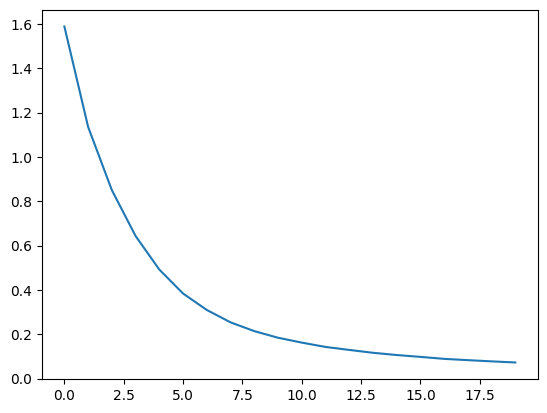

In [28]:
import matplotlib.pyplot as plt

plt.plot(losses_per_epoch)
plt.show()